In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [36]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


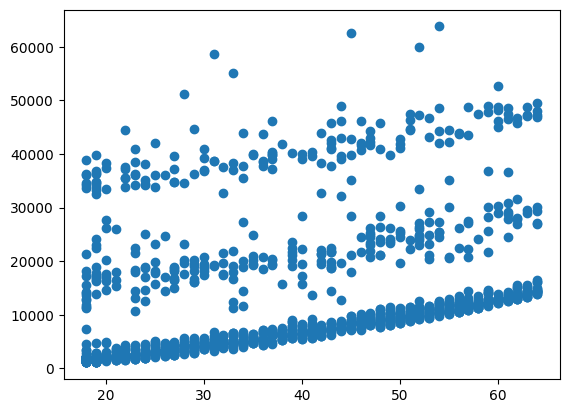

In [13]:
plt.scatter(data.age, data.charges)

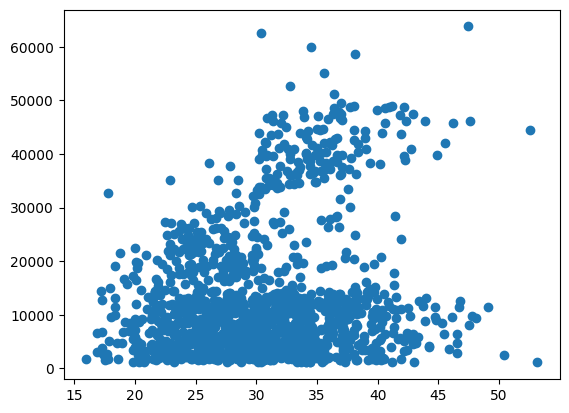

In [14]:
plt.scatter(data.bmi, data.charges)

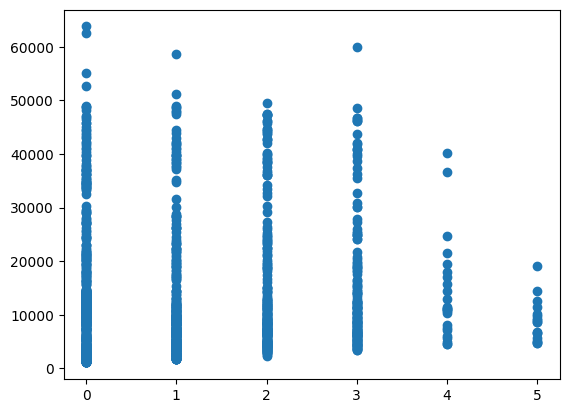

In [15]:
plt.scatter(data.children, data.charges)

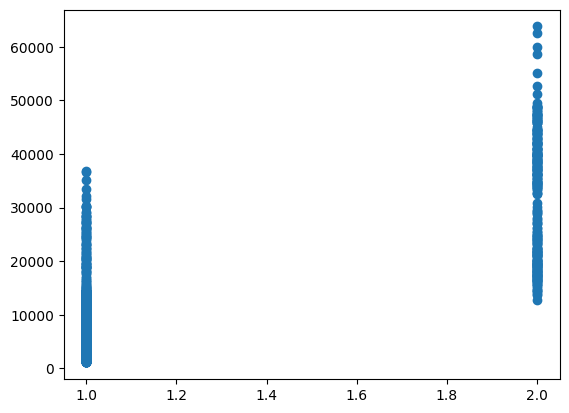

In [45]:
plt.scatter(data.smoker, data.charges)

In [17]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

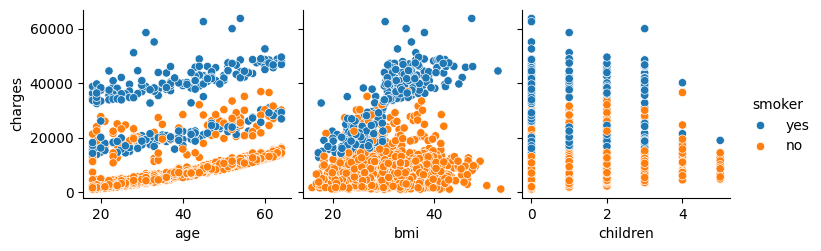

In [5]:
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars=['charges'], hue='smoker')
plt.show()

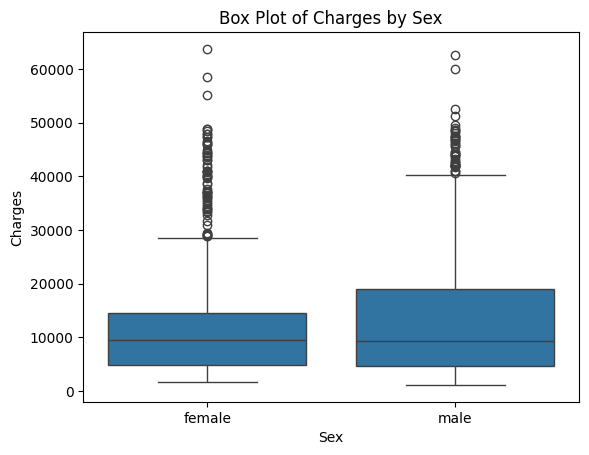

In [7]:
sns.boxplot(x='sex', y='charges', data=data)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Box Plot of Charges by Sex')
plt.show()

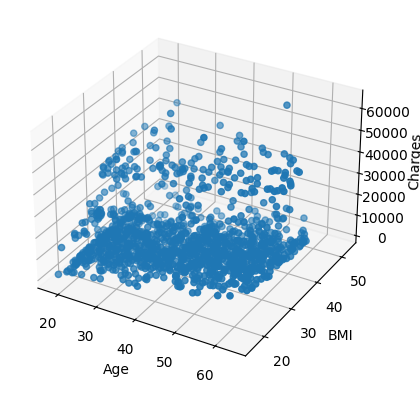

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['age'], data['bmi'], data['charges'])

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')

plt.show()




In [39]:
data['sex'] = data['sex'].replace({'male': 1, 'female': 2})

In [72]:
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

In [73]:
data['region'] = data['smoker'].replace({'southwest': 0, 'southeast': 0, 'northwest': 0, 'northeast': 0})

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [43]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

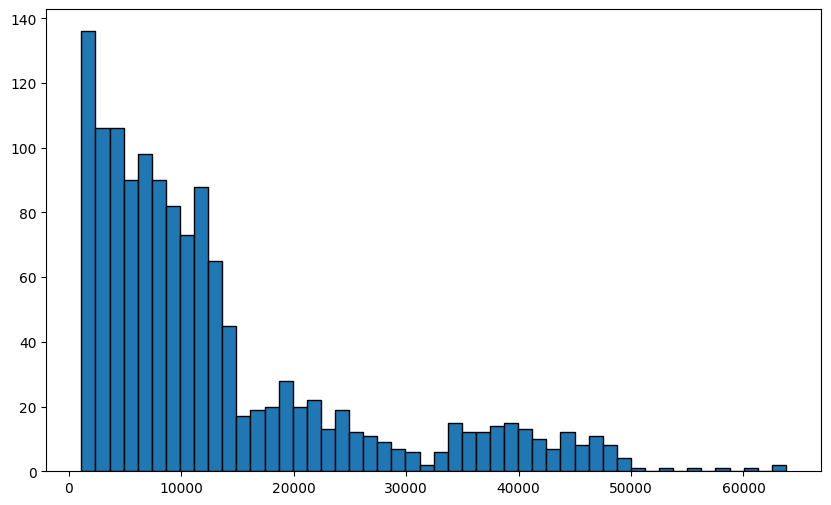

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data['charges'], bins=50, ec='black')
plt.show()

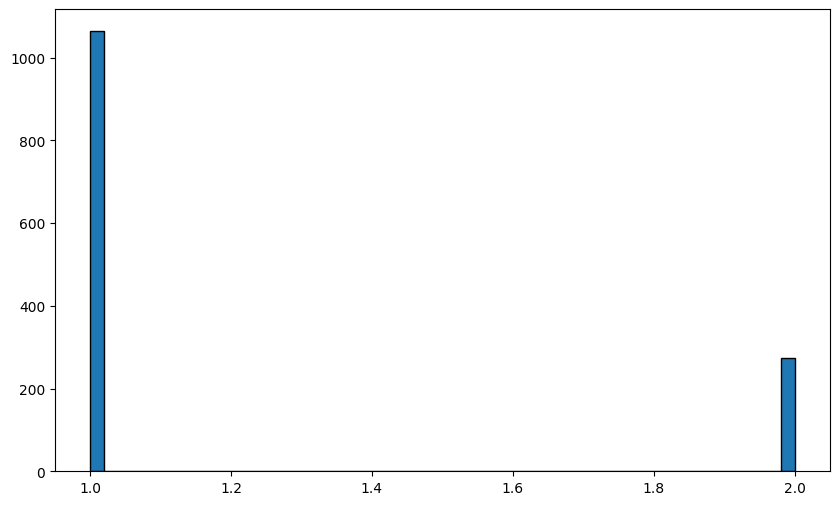

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(data['smoker'], bins=50, ec='black')
plt.show()

In [54]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,2,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [63]:
print(data['charges'].corr(data['age']))
print(data['charges'].corr(data['sex']))
print(data['charges'].corr(data['bmi']))
print(data['charges'].corr(data['children']))
print(data['charges'].corr(data['smoker']))


0.2990081933306476
-0.05729206220202531
0.19834096883362878
0.06799822684790469
0.7872514304984779


In [70]:
mask = np.zeros_like (data.corr ())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]= True 
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

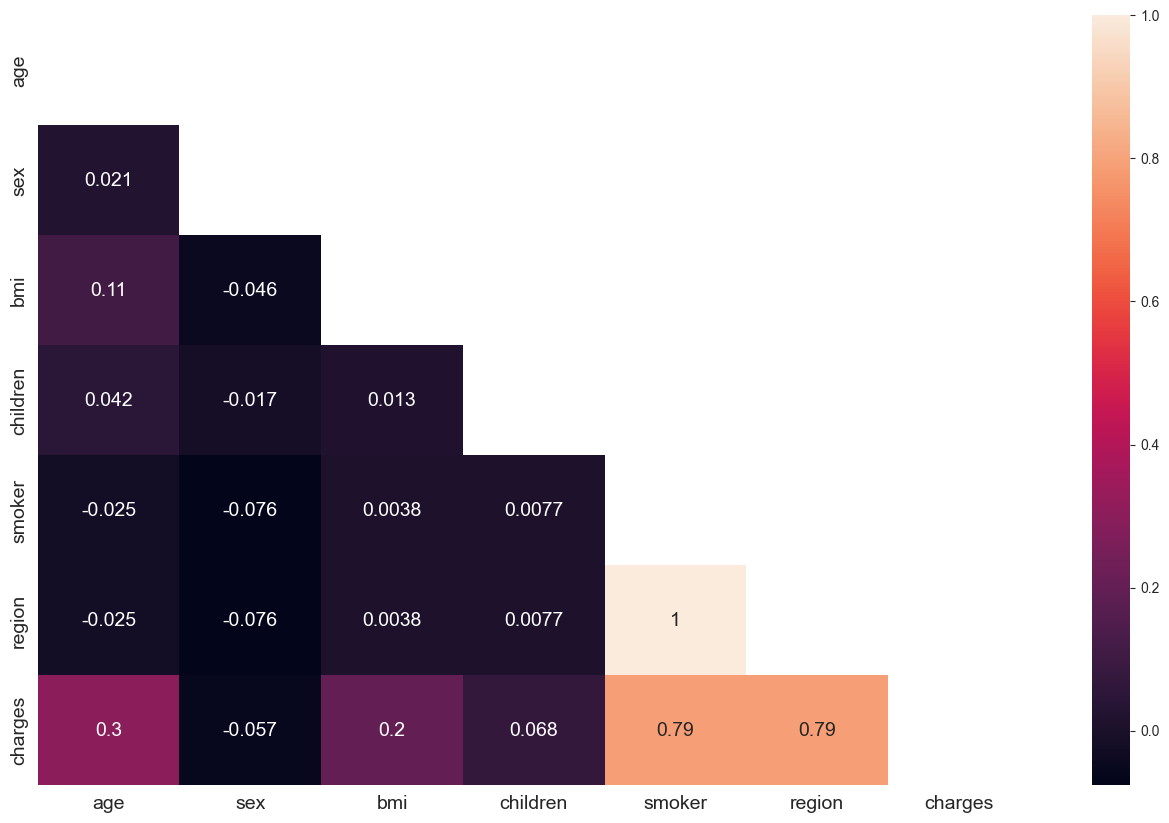

In [75]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask , annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [76]:
charges = data['charges']
features = data.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, charges,test_size=0.2, random_state=10)

In [77]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Training data r-sq:', regr.score(X_train, y_train))
print('Test data r-sq:', regr.score(X_test, y_test))

print('Inters', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-sq: 0.7628632760349083
Test data r-sq: 0.6930233517708537
Inters -37291.358027005226


,coef
age,259.861190
sex,245.970305
bmi,338.547022
children,542.264513
smoker,12041.667441
region,12041.667441
